<a href="https://colab.research.google.com/github/sagar-bhusan/Final_Year_Project/blob/main/FInal_Year_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install split-folders

In [ ]:
%%capture
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/dataset", output="./", seed=1337, ratio=(0.8, 0.2))

In [ ]:
import os

In [ ]:
os.listdir("./train")

['boat',
 'seaplane',
 'motorcycle',
 'train',
 'bicycle',
 'airplane',
 'truck',
 'motorbus']

In [ ]:
os.listdir("./val")

['boat',
 'seaplane',
 'motorcycle',
 'train',
 'bicycle',
 'airplane',
 'truck',
 'motorbus']

In [ ]:
labels = os.listdir("./train")
print(labels)

['boat', 'seaplane', 'motorcycle', 'train', 'bicycle', 'airplane', 'truck', 'motorbus']


In [ ]:
import pandas as pd

names=[]
num_train=[]
num_test=[]
num_total = []

for name in labels:
    image_number_train = len(os.listdir(f"./train/{name}"))
    image_number_test = len(os.listdir(f"./val/{name}"))
    
    names.append(name)
    num_train.append(image_number_train)
    num_test.append(image_number_test)
    num_total.append(image_number_train+image_number_test)
dic = {'Label': names, 'Number(training)': num_train, 'Number(testing)': num_test, 'Total': num_total} 
    
df = pd.DataFrame(dic)
df

,Label,Number(training),Number(testing),Total
0,boat,529,133,662
1,seaplane,284,71,355
2,motorcycle,586,147,733
3,train,243,61,304
4,bicycle,300,75,375
5,airplane,402,101,503
6,truck,655,164,819
7,motorbus,253,64,317


In [ ]:
print(f"Total training images: {df['Number(training)'].sum()}")
print(f"Total testing images: {df['Number(testing)'].sum()}")

Total training images: 3252
Total testing images: 816


In [ ]:
import random
def random_image(path):       
    labels = os.listdir(path)
    random_label = random.choice(labels)

    image_with_choson_label = os.listdir(f"./train/{random_label}")
    random_image = random.choice(image_with_choson_label)
    img_path = f"./train/{random_label}/{random_image}"
    print(random_label)
    return img_path
    fig, ax = plt.subplots(figsize=(2,2))
    ax.imshow(img)
    ax.axis('off')
    plt.show()

boat


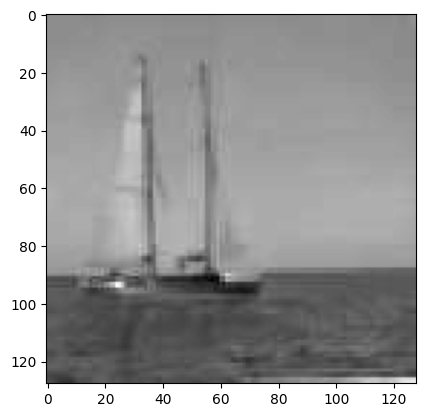

In [ ]:
import PIL
import matplotlib.pyplot as plt

img_check = random_image("./train")
img = PIL.Image.open(img_check)
gray_img = img.convert("L")
plt.imshow(gray_img, cmap='gray')
plt.axis('on')
plt.show()


motorcycle


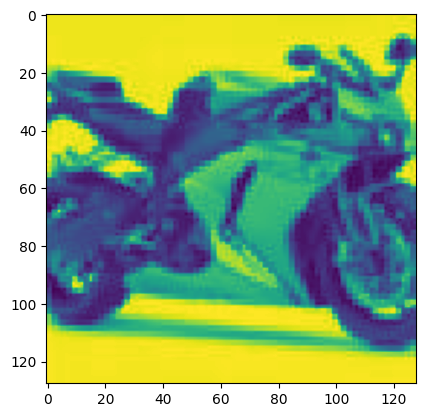

In [ ]:
import PIL
import matplotlib.pyplot as plt

img_check = random_image("./train")
img = PIL.Image.open(img_check)
gray_img = img.convert("L")
plt.imshow(gray_img)

train


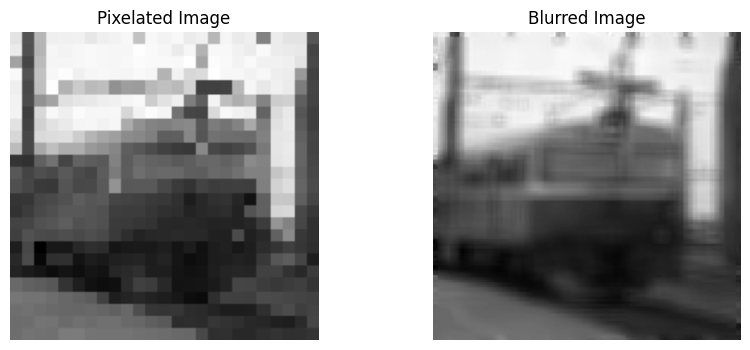

In [ ]:
import PIL
import matplotlib.pyplot as plt
from PIL import ImageFilter

img_check = random_image("./train")
img = PIL.Image.open(img_check)
gray_img = img.convert("L")

# Pixelation
pixelated_img = gray_img.resize((int(gray_img.width * 0.2), int(gray_img.height * 0.2)), resample=PIL.Image.NEAREST)
pixelated_img = pixelated_img.resize(gray_img.size, resample=PIL.Image.NEAREST)

# Blur
blurred_img = gray_img.filter(ImageFilter.BLUR)

# Display the grayscale, pixelated, and blurred images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
#axes[0].imshow(gray_img, cmap='gray')
#axes[0].set_title('Grayscale Image')
#axes[0].axis('off')

axes[0].imshow(pixelated_img, cmap='gray')
axes[0].set_title('Pixelated Image')
axes[0].axis('off')

axes[1].imshow(blurred_img, cmap='gray')
axes[1].set_title('Blurred Image')
axes[1].axis('off')

plt.show()


In [ ]:
import PIL
import matplotlib.pyplot as plt
from PIL import ImageFilter
import random
import os

def random_image(path):
    labels = os.listdir(path)
    random_label = random.choice(labels)

    image_with_chosen_label = os.listdir(f"./train/{random_label}")
    random_image = random.choice(image_with_chosen_label)
    img_path = f"./train/{random_label}/{random_image}"
    print(random_label)
    return img_path

def pixelate_image(image):
    pixelated_img = image.resize((int(image.width * 0.2), int(image.height * 0.2)), resample=PIL.Image.NEAREST)
    pixelated_img = pixelated_img.resize(image.size, resample=PIL.Image.NEAREST)
    return pixelated_img

def blur_image(image):
    blurred_img = image.filter(ImageFilter.BLUR)
    return blurred_img

# Path to your dataset directory
dataset_path = "./train"

# Path to the folder to store the modified images
modified_images_path = "./PixalatedandBlurImages"

# Create the 'PixalatedImages' folder if it doesn't exist
if not os.path.exists(modified_images_path):
    os.makedirs(modified_images_path)

# Iterate through all images in the dataset directory
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        image_path = os.path.join(root, file)

        # Load the image
        img = PIL.Image.open(image_path)

        # Apply pixelation and blur
        pixelated_img = pixelate_image(img)
        blurred_img = blur_image(img)

        # Save the modified images
        pixelated_img_path = os.path.join(modified_images_path, f"pixelated_{file}")
        blurred_img_path = os.path.join(modified_images_path, f"blurred_{file}")

        pixelated_img.save(pixelated_img_path)
        blurred_img.save(blurred_img_path)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the folder containing the modified images
modified_images_path = "./PixalatedandBlurImages"

# Create the 'PixalatedandBlurImages' folder if it doesn't exist
if not os.path.exists(modified_images_path):
    os.makedirs(modified_images_path)

# Iterate through all images in the dataset directory
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        image_path = os.path.join(root, file)

        # Load the image
        img = PIL.Image.open(image_path)

        # Apply pixelation and blur
        pixelated_img = pixelate_image(img)
        blurred_img = blur_image(img)

        # Get the class/label of the image
        class_label = os.path.basename(root)

        # Create the class directory if it doesn't exist
        class_directory = os.path.join(modified_images_path, class_label)
        if not os.path.exists(class_directory):
            os.makedirs(class_directory)

        # Save the modified images in the class directory
        pixelated_img_path = os.path.join(class_directory, f"pixelated_{file}")
        blurred_img_path = os.path.join(class_directory, f"blurred_{file}")

        pixelated_img.save(pixelated_img_path)
        blurred_img.save(blurred_img_path)

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory and specify the class_mode
dataflow = datagen.flow_from_directory(
    modified_images_path,
    target_size=(32, 32),
    color_mode='grayscale',
    class_mode='categorical',  # or 'binary' for binary classification
    batch_size=32
)


Found 6504 images belonging to 8 classes.


In [ ]:
import os

# Path to the folder containing the modified images
modified_images_path = "./PixalatedandBlurImages"

# Initialize counters
total_pixelated_images = 0
total_blurred_images = 0

# Iterate through the files in the modified images folder
for file in os.listdir(modified_images_path):
    if file.startswith("pixelated_"):
        total_pixelated_images += 1
    elif file.startswith("blurred_"):
        total_blurred_images += 1

# Print the counts
print("Total pixelated images:", total_pixelated_images)
print("Total blurred images:", total_blurred_images)


Total pixelated images: 3252
Total blurred images: 3252


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers


In [ ]:
pixelated_images_path = "/content/PixalatedandBlurImages"

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
dataflow = datagen.flow_from_directory(
    pixelated_images_path,
    target_size=(32, 32),
    color_mode='grayscale',
    class_mode='sparse',
    batch_size=32
)


Found 6504 images belonging to 8 classes.


In [ ]:
model.fit(dataflow, epochs=10)


Epoch 1/10
204/204 [==============================] - 10s 43ms/step - loss: 1.0413 - accuracy: 0.6599
Epoch 2/10
204/204 [==============================] - 10s 51ms/step - loss: 0.5849 - accuracy: 0.8230
Epoch 3/10
204/204 [==============================] - 10s 48ms/step - loss: 0.4556 - accuracy: 0.8590
Epoch 4/10
204/204 [==============================] - 8s 41ms/step - loss: 0.3808 - accuracy: 0.8812
Epoch 5/10
204/204 [==============================] - 10s 50ms/step - loss: 0.3237 - accuracy: 0.8990
Epoch 6/10
204/204 [==============================] - 10s 48ms/step - loss: 0.2736 - accuracy: 0.9153
Epoch 7/10
204/204 [==============================] - 10s 47ms/step - loss: 0.2398 - accuracy: 0.9279
Epoch 8/10
204/204 [==============================] - 10s 50ms/step - loss: 0.2077 - accuracy: 0.9382
Epoch 9/10
204/204 [==============================] - 8s 41ms/step - loss: 0.1850 - accuracy: 0.9439
Epoch 10/10
204/204 [==============================] - 9s 42ms/step - loss: 0.1594 -